In [1]:
from deep_dream import *

In [2]:
net = DictNet(1000)

In [3]:
net.load_state_dict(torch.load("../models/net_1000_0.001_200_0.0.pth",map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
def show_dream(dreamer,label,loss_type):
    im,val = dreamer(label=label,loss_type=loss_type)
    im = dreamer.postProcess(im)
    dreamer.show(im)

In [5]:
dreamer = DeepDream(net,(1,32,128),(0.47,),(0.14,),use_gaussian_filter=True)
label = 3

In [6]:
random_seed = 1
im = dreamer.createInputImage(random_seed)
im = dreamer.prepInputImage(im)
im = im.to(dreamer.device)

im = Variable(im.unsqueeze(0),requires_grad=True)
out = dreamer.net(im)
print(out)

tensor([[-21.7093, -25.8692, -29.2235, -26.6374, -37.0795, -24.0299, -20.8118,
         -28.7853, -29.5261, -32.8881, -29.0520, -15.1690, -28.5440, -21.0959,
         -27.6059, -13.4245, -25.1284, -19.1489, -31.4759, -29.9176, -18.5119,
         -25.5877, -36.6051, -27.9708, -35.7038, -25.0429, -14.6998, -15.8214,
         -17.3824, -37.8268, -28.6751, -18.3680, -32.3695, -26.9420, -35.0536,
         -31.3421, -29.3781, -29.8628, -26.4262, -18.8047, -26.9578, -24.3636,
         -29.4546, -27.3745, -19.9931, -16.9902, -26.2951, -17.6536, -20.2599,
         -30.6868, -30.3149, -34.6923, -25.8897, -40.8149, -34.2296, -27.6073,
         -27.6312,  -6.1634, -20.9652, -34.9200, -16.8543, -25.5511, -30.8833,
         -24.0516, -37.7699, -29.2652, -26.1539, -23.0885, -24.3979, -17.1478,
         -32.0797, -28.7284, -28.8490, -16.9850, -28.9012, -32.3533, -32.6370,
         -30.2274, -26.1341, -28.9525, -32.1502, -16.2662, -36.6022, -26.8332,
         -29.6360, -37.7484, -28.4498, -31.6884, -21

Activation before optimizing : -30.800006866455078 
Probablity before optimizing : 0.5821488499641418 and label 261
Dreaming...
Activation after optimizing : 73.12479400634766 
Probablity after optimizing : 1.0 and label 3


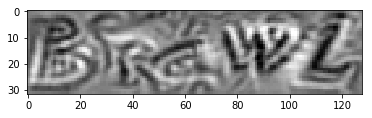

In [7]:
loss_type = 1
show_dream(dreamer,label,loss_type)

Activation before optimizing : -30.800006866455078 
Probablity before optimizing : 0.5821488499641418 and label 261
Dreaming...
Activation after optimizing : -159.24591064453125 
Probablity after optimizing : 0.9995416402816772 and label 489


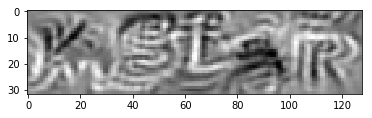

In [8]:
loss_type = 2
show_dream(dreamer,label,loss_type)

In [ ]:
loss_type = 3
show_dream(dreamer,label,loss_type)

Activation before optimizing : -30.800006866455078 
Probablity before optimizing : 0.5821488499641418 and label 261
Dreaming...


/mnt/c/Users/User/Desktop/activation_maximization_mjsynth/library/deep_dream.py:109: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = 1 - F.softmax(out)[0,label]


In [ ]:
loss_type = 4
show_dream(dreamer,label,loss_type)

In [ ]:
# loss_type = 5
# show_dream(dreamer,label,loss_type)